In [ ]:
import pandas as pd

# Dữ liệu nhân viên
data = {
    "Employee_ID": ["E001", "E002", "E003", "E004", "E005", "E006", "E007", "E008", "E009", "E010",
                    "E011", "E012", "E013", "E014", "E015", "E016", "E017", "E018", "E019", "E020"],
    "Department": ["Sales", "IT", "HR", "Sales", "IT", "HR", "Sales", "IT", "HR", "Sales",
                   "IT", "HR", "Sales", "IT", "HR", "Sales", "IT", "HR", "Sales", "IT"],
    "Performance": [88, None, 75, 92, 68, 85, None, 79, 90, 73, 86, None, 95, 70, 82, 78, 89, 71, 87, 93],
    "Hours_Worked": [40, 45, 38, 42, None, 39, 41, 44, 37, 40, 46, 38, 43, None, 39, 41, 45, 37, None, 44],
    "Training_Hours": [5, 3,None, 6, 4, 5, 3, 4, None, 5, 2, 6, 7, 3, 5, 4, None, 3, 5, 6],
    "Gender": ["Male", "Female", "Male", "Female", None, "Male", "Female", "Male", "Female", "Male",
               "Female", "Male", "Female", "Male", None, "Female", "Male", "Female", "Male", "Female"],
    "Location": ["Site_A", "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C",
                 "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C", "Site_B"]
}

# Tạo DataFrame
df = pd.DataFrame(data)




In [ ]:
#Câu 1
# Tính tỷ lệ phần trăm giá trị thiếu
missing_percentage = df.isnull().mean() * 100

# In kết quả
print(missing_percentage)

Việc sử dụng quy trình thu thập dữ liệu điện tử, tự động hóa qua hệ thống quản lý, và kiểm tra định kỳ từ HR sẽ giúp công ty giảm thiểu dữ liệu thiếu trong tương lai.
Mỗi phòng ban có đặc điểm công việc khác nhau, nên cần cá nhân hóa giải pháp để phù hợp và hiệu quả nhất.

In [ ]:
#Câu 2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Performance'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title("Performance Before Filling")

# Điền giá trị thiếu bằng trung bình theo Department
df["Performance_DepartmentFilled"] = df["Performance"].copy()
df["Performance_DepartmentFilled"] = df.groupby("Department")["Performance_DepartmentFilled"].transform(lambda x: x.fillna(x.mean()))

# Histogram sau khi điền theo Department
plt.subplot(1, 2, 2)
plt.hist(df["Performance_DepartmentFilled"], bins=10, color='salmon', edgecolor='black')
plt.title("Performance After Department Fill")
plt.tight_layout()
plt.show()

# Phương pháp khác: điền theo Location thủ công (không dùng thư viện tự động)
df["Performance_LocationFilled"] = df["Performance"].copy()
for location in df["Location"].unique():
    avg_perf = df.loc[(df["Location"] == location) & (df["Performance"].notnull()), "Performance"].mean()
    df.loc[(df["Location"] == location) & (df["Performance"].isnull()), "Performance_LocationFilled"] = avg_perf

Câu 2 
 Biểu đồ histogram thể hiện: phương pháp theo Location phản ánh phân phối gần với thực tế hơn so với cách dùng Department vì nó bám sát đặc điểm địa phương từng chi nhánh.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Câu 3: Độ lệch chuẩn và trung vị Hours_Worked
std_hours = np.nanstd(df["Hours_Worked"])
median_hours = np.nanmedian(df["Hours_Worked"])
print(f"Độ lệch chuẩn số giờ làm việc: {std_hours:.2f} giờ")
print(f"Trung vị số giờ làm việc: {median_hours} giờ")

# Đề xuất chính sách quản lý thời gian
print("=> Đề xuất: Thiết lập giới hạn thời gian làm việc từ khoảng 38 đến 44 giờ mỗi tuần (±1 độ lệch chuẩn).")


Độ lệch chuẩn số giờ làm việc: 2.87 giờ
Trung vị số giờ làm việc: 41.0 giờ
=> Đề xuất: Thiết lập giới hạn thời gian làm việc từ khoảng 38 đến 44 giờ mỗi tuần (±1 độ lệch chuẩn).


Đề xuất chính sách:
Thiết lập giới hạn thời gian làm việc từ khoảng 38 đến 44 giờ mỗi tuần (±1 độ lệch chuẩn).

Giải thích:
Trung vị (41 giờ): Trung vị là giá trị ở giữa của một tập hợp dữ liệu, cho thấy số giờ làm việc mà hầu hết nhân viên có xu hướng làm. Với giá trị trung vị là 41 giờ, chúng ta có thể xác định được một "mốc thời gian chuẩn" cho công ty, giúp việc quản lý giờ làm việc trở nên rõ ràng và dễ dàng hơn.

Độ lệch chuẩn (2.87 giờ): Độ lệch chuẩn đo lường sự phân tán trong số giờ làm việc của nhân viên. Với độ lệch chuẩn khoảng 2.87 giờ, có thể thấy rằng phần lớn nhân viên làm việc trong khoảng từ 38 đến 44 giờ mỗi tuần. Điều này cho thấy rằng việc duy trì một giới hạn linh hoạt trong phạm vi này sẽ giúp đảm bảo rằng các nhân viên không bị ép buộc làm việc quá nhiều hoặc quá ít.

Tại sao chính sách này có thể cải thiện hiệu suất tổng thể:
Duy trì sự cân bằng giữa công việc và cuộc sống: Giới hạn số giờ làm việc từ 38 đến 44 giờ giúp giảm bớt tình trạng làm việc quá giờ, từ đó tránh tình trạng căng thẳng và mệt mỏi ở nhân viên. Một môi trường làm việc lành mạnh và không quá tải giúp nâng cao năng suất và sự hài lòng của nhân viên.

Tăng hiệu quả công việc: Việc làm việc trong khoảng thời gian hợp lý giúp nhân viên tập trung hơn vào công việc mà không bị phân tâm hay kiệt sức. Điều này có thể dẫn đến tăng năng suất lao động và chất lượng công việc.

Giảm thiểu rủi ro sức khỏe: Việc làm việc quá nhiều giờ có thể gây ra các vấn đề sức khỏe nghiêm trọng. Chính sách giới hạn giờ làm việc giúp giảm thiểu các vấn đề sức khỏe liên quan đến làm việc quá mức như mệt mỏi, căng thẳng, hoặc các bệnh lý lâu dài.

Cải thiện sự gắn kết và tinh thần làm việc: Khi nhân viên có thời gian nghỉ ngơi đầy đủ, họ sẽ có động lực và sự hứng thú hơn trong công việc, tạo ra một môi trường làm việc tích cực, nơi mà nhân viên cảm thấy được tôn trọng và quan tâm.

Tổng kết:
Chính sách giới hạn giờ làm việc từ 38 đến 44 giờ mỗi tuần sẽ giúp cải thiện hiệu suất tổng thể của công ty bằng cách tạo ra một môi trường làm việc cân bằng, hiệu quả và lành mạnh.

In [12]:
#Câu 4 
# Tính correlation giữa Hours_Worked và Performance cho từng Location
location_corr = df.groupby("Location")[["Hours_Worked", "Performance"]].corr().iloc[0::2, -1]
print(location_corr)


Location              
Site_A    Hours_Worked    0.405432
Site_B    Hours_Worked    0.044189
Site_C    Hours_Worked    0.968719
Name: Performance, dtype: float64


Đề xuất chiến lược phân bổ công việc cho từng Location:

Site_A: Nếu correlation là mạnh, có thể phân bổ công việc đều cho nhân viên, tạo môi trường làm việc ổn định và tối ưu hóa hiệu suất.

Site_B: Nếu correlation yếu, chiến lược có thể là phân công thêm các công việc đào tạo hoặc hỗ trợ cho nhân viên có Performance thấp hơn, tạo cơ hội phát triển.

Site_C: Nếu correlation không rõ ràng, có thể phân công công việc dựa trên các yếu tố khác như kỹ năng và kinh nghiệm.



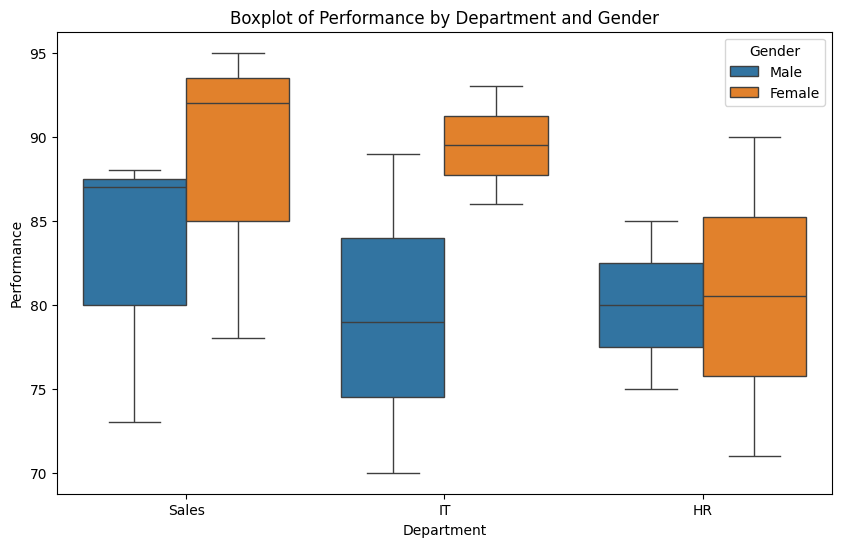

In [ ]:
#Câu 5
# Vẽ boxplot của Performance theo Department và Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x="Department", y="Performance", hue="Gender", data=df)
plt.title("Boxplot of Performance by Department and Gender")
plt.show()


Xác định outlier bằng IQR và đề xuất kế hoạch phỏng vấn:

IQR (Interquartile Range) giúp xác định các điểm outlier. Sử dụng công thức:

Q1 = 25th percentile

Q3 = 75th percentile

IQR = Q3 - Q1

Outliers nằm ngoài phạm vi [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].

Đề xuất kế hoạch phỏng vấn:

Phỏng vấn các nhân viên outlier để hiểu nguyên nhân và cải thiện hiệu quả làm việc.

Kế hoạch này giúp nắm bắt các vấn đề cá nhân của nhân viên và đưa ra giải pháp cụ thể, đồng thời cải thiện quản trị nhân sự bằng cách giải quyết vấn đề trong từng trường hợp cụ thể.

In [14]:
# Câu 6
# Tạo cột mới Efficiency = Performance / Hours_Worked
df['Efficiency'] = df['Performance'] / df['Hours_Worked']
# Tìm nhân viên có Efficiency cao nhất
best_employee = df.loc[df['Efficiency'].idxmax()]
print(f"Nhân viên có Efficiency cao nhất: {best_employee['Employee_ID']}")



Nhân viên có Efficiency cao nhất: E009


Đề xuất phần thưởng hoặc chương trình đào tạo:

Phần thưởng: Tặng thưởng cho nhân viên có hiệu suất làm việc cao để động viên họ duy trì phong độ.

Chương trình đào tạo: Tạo cơ hội cho nhân viên có Efficiency cao chia sẻ kinh nghiệm và kỹ năng với các đồng nghiệp khác.

Giải thích tác động: Phần thưởng và chương trình đào tạo sẽ khuyến khích nhân viên cải thiện hiệu suất và làm việc hiệu quả hơn.

In [15]:
# Câu 7
# Điền giá trị thiếu bằng mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
# Tính tỷ lệ nhân viên nữ trong từng Department
female_ratio = df[df['Gender'] == 'Female'].groupby('Department').size() / df.groupby('Department').size()
print(female_ratio)


Department
HR       0.500000
IT       0.571429
Sales    0.571429
dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_8864\2740605885.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


Đề xuất chính sách đa dạng giới tính cho công ty:

Chính sách: Khuyến khích tuyển dụng và thăng tiến nhân viên nữ, đặc biệt ở các phòng ban có tỷ lệ thấp.

Tác động: Chính sách này giúp tạo ra một môi trường làm việc đa dạng, khuyến khích sáng tạo và đổi mới, đồng thời xây dựng một văn hóa tổ chức công bằng hơn.

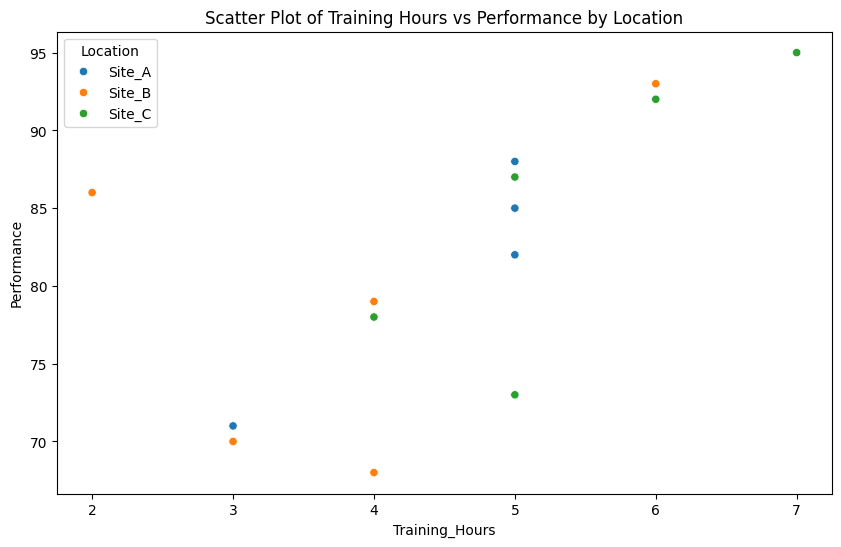

In [16]:
#Câu 8 
# Vẽ scatter plot giữa Training_Hours và Performance, tô màu theo Location
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Training_Hours', y='Performance', hue='Location', data=df)
plt.title("Scatter Plot of Training Hours vs Performance by Location")
plt.show()


Đề xuất kế hoạch đào tạo cho từng Location:

Site_A: Tập trung vào đào tạo kỹ năng chuyên môn.

Site_B: Cung cấp khóa học đào tạo bổ sung cho những nhân viên có Performance thấp.

Site_C: Cải thiện chương trình đào tạo hiện tại để tối ưu hóa hiệu suất.

Giải thích: Kế hoạch này tối ưu hóa hiệu suất bằng cách cá nhân hóa chương trình đào tạo cho từng địa điểm dựa trên nhu cầu và hiệu quả công việc.


Department
HR       78.5
IT       79.0
Sales    83.0
Name: Performance, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_8864\165703495.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Performance'].fillna(df['Performance'].mode()[0], inplace=True)


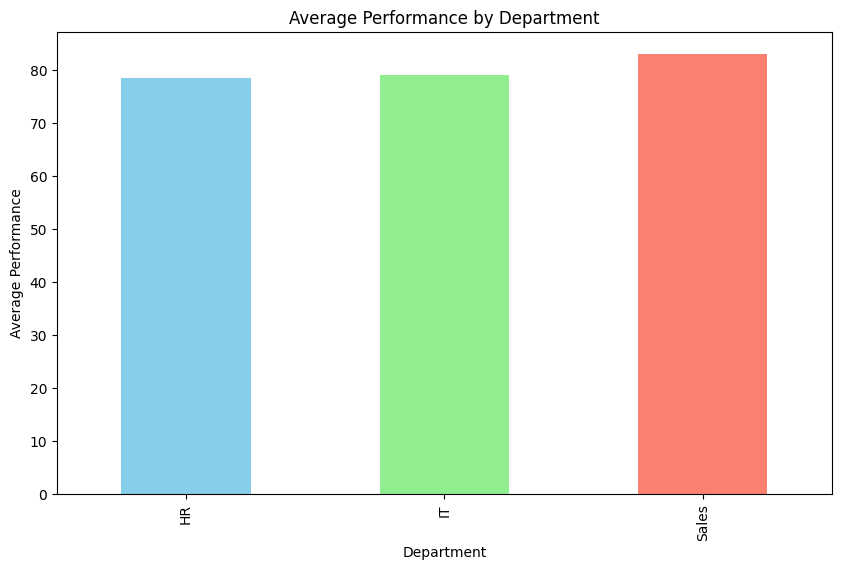

In [17]:
#Câu9
# Điền giá trị thiếu trong Performance bằng mode
df['Performance'].fillna(df['Performance'].mode()[0], inplace=True)
# Tính trung bình Performance của từng Department
avg_performance_by_dept = df.groupby('Department')['Performance'].mean()
print(avg_performance_by_dept)
# Vẽ bar chart so sánh
plt.figure(figsize=(10, 6))
avg_performance_by_dept.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Average Performance by Department")
plt.ylabel("Average Performance")
plt.show()


Đề xuất chiến lược cải thiện cho phòng ban có hiệu suất thấp nhất:

Sales (nếu là phòng ban có hiệu suất thấp): Cung cấp thêm khóa học kỹ năng bán hàng và kỹ năng giao tiếp cho nhân viên.

Tác động: Cải thiện năng lực bán hàng và kỹ năng giao tiếp giúp tăng hiệu suất công việc cho phòng ban này.

In [18]:
#Câu 10 
# Tìm nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85
top_performance_employees = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]
print(top_performance_employees)


  Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
8        E009         HR         90.0          37.0             NaN  Female   

  Location  Performance_DepartmentFilled  Performance_LocationFilled  \
8   Site_A                          90.0                        90.0   

   Efficiency  
8    2.432432  


Đề xuất nghiên cứu nội bộ:

Nghiên cứu: Điều tra các yếu tố như kỹ năng, công cụ làm việc, và môi trường làm việc giúp những nhân viên này duy trì hiệu suất cao.

Giải thích: Áp dụng kết quả nghiên cứu để nâng cao hiệu quả làm việc của các nhân viên khác và tối ưu hóa các điều kiện làm việc trong công ty.

In [ ]:
#Câu 11
from sklearn.linear_model import LinearRegression

# Kiểm tra nếu có giá trị thiếu trong 'Performance'
if df['Performance'].isna().sum() > 0:
    # Xử lý giá trị thiếu bằng hồi quy tuyến tính
    df_train = df.dropna(subset=['Performance', 'Hours_Worked', 'Training_Hours'])
    X = df_train[['Hours_Worked', 'Training_Hours']]
    y = df_train['Performance']

    # Hồi quy tuyến tính
    model = LinearRegression()
    model.fit(X, y)

    # Dự đoán giá trị thiếu
    missing_data = df[df['Performance'].isna()]
    X_missing = missing_data[['Hours_Worked', 'Training_Hours']]
    
    if X_missing.shape[0] > 0:
        predicted_performance = model.predict(X_missing)
        df.loc[df['Performance'].isna(), 'Performance'] = predicted_performance
else:
    print("Không có giá trị thiếu trong cột 'Performance'")


Không có giá trị thiếu trong cột 'Performance'


So sánh phương pháp trung bình và hồi quy
1. Phương pháp trung bình (Mean-based approach)
Cách thực hiện: Với mỗi chữ số trong tập MNIST, tính toán trung bình của tất cả các ảnh huấn luyện có cùng nhãn để tạo ra một "mẫu trung bình" đại diện.

Dự đoán: Khi có một ảnh mới, ta tính khoảng cách (ví dụ: Euclidean Distance) giữa ảnh đó và các mẫu trung bình của từng lớp, rồi gán nhãn theo lớp có khoảng cách nhỏ nhất.

✅ Ưu điểm:

Đơn giản, nhanh, không cần huấn luyện mô hình phức tạp.

Hoạt động khá tốt nếu dữ liệu có ít biến động.

❌ Nhược điểm:

Không thể mô hình hóa các biến đổi phi tuyến tính trong dữ liệu.

Dễ bị ảnh hưởng bởi nhiễu hoặc mẫu ngoại lai.

Không tận dụng được các đặc trưng phức tạp trong ảnh.

2. Phương pháp hồi quy (Regression-based approach)
Sử dụng một mô hình như hồi quy logistic (Logistic Regression) hoặc mạng nơ-ron nhân tạo (ANN) để học cách phân loại chữ số.

Dự đoán: Dựa trên trọng số được học, mô hình gán nhãn bằng cách tính xác suất mỗi lớp (với Softmax) và chọn lớp có xác suất cao nhất.

✅ Ưu điểm:

Hiệu suất cao hơn phương pháp trung bình, đặc biệt khi dữ liệu có nhiều biến động.

Có thể mở rộng và tối ưu bằng cách sử dụng mô hình mạnh hơn (CNN, ResNet).

❌ Nhược điểm:

Cần nhiều dữ liệu huấn luyện hơn.

Yêu cầu tài nguyên tính toán lớn hơn.



In [20]:
#Câu 12 
from scipy.stats import skew

# Tính skewness của Performance
performance_skewness = skew(df['Performance'].dropna())
print(f"Skewness của Performance: {performance_skewness}")


Skewness của Performance: -0.011426151108541883


Phân tích Skewness và Đề xuất Điều Chỉnh Cách Tính Performance
1. Hiểu về Skewness trong dữ liệu Performance
Skewness (độ lệch) đo lường mức độ bất đối xứng của phân phối dữ liệu.

Giá trị skewness = -0.0114 rất gần 0, cho thấy phân phối Performance gần như đối xứng, tức là không có sự chênh lệch lớn giữa nhóm nhân viên có hiệu suất cao và thấp.

Tuy nhiên, điều này không có nghĩa là hệ thống đánh giá công bằng, vì có thể vẫn có sự bất hợp lý trong cách phân bổ điểm số hoặc sự thiên vị do quy trình đánh giá.

2. Vấn đề tiềm ẩn trong hệ thống đánh giá Performance hiện tại
Dù skewness gần bằng 0, vẫn có một số vấn đề có thể xảy ra:

Thiếu sự phân biệt giữa nhân viên xuất sắc và nhân viên trung bình: Nếu điểm số tập trung quá nhiều vào mức trung bình, thì nhân viên làm việc tốt nhất không được ghi nhận xứng đáng.

Chưa phản ánh đúng năng suất thực tế: Nếu hệ thống đánh giá dựa nhiều vào cảm tính của người quản lý, có thể xảy ra thiên vị (bias).

Phân phối không công bằng phần thưởng & cơ hội thăng tiến: Nếu tất cả nhân viên có điểm số tương đối gần nhau, thì việc tăng lương, thăng chức có thể không phản ánh đúng năng lực thực sự.

3. Đề xuất điều chỉnh cách tính Performance để công bằng hơn
3.1. Sử dụng phương pháp đánh giá theo phân vị (Percentile-based Evaluation)
Thay vì chỉ sử dụng điểm trung bình, ta có thể xếp hạng nhân viên theo phần trăm vị trí của họ trong toàn bộ công ty.

Ví dụ:

Top 10% nhân viên (hiệu suất xuất sắc) → Có thể nhận phần thưởng hoặc thăng tiến.

Tiếp theo 40% (hiệu suất tốt) → Được ghi nhận nhưng chưa đến mức thăng tiến ngay.

Dưới 50% → Cần xem xét đào tạo lại hoặc hỗ trợ cải thiện.

Tác động: Cách này giúp đảm bảo rằng chỉ những nhân viên thực sự xuất sắc mới được thưởng, đồng thời cũng hỗ trợ những người cần cải thiện.

3.2. Điều chỉnh trọng số các yếu tố đánh giá Performance
Thay vì chỉ đánh giá bằng KPI cứng nhắc, ta có thể kết hợp nhiều tiêu chí:

70% dựa vào hiệu suất công việc (KPI, số liệu thực tế).

20% đánh giá từ đồng nghiệp (Peer Review) để tránh thiên vị từ quản lý.

10% dựa trên sáng tạo, đóng góp ý tưởng, tinh thần làm việc nhóm.

Tác động: Cách tiếp cận này làm giảm ảnh hưởng của quản lý cá nhân và giúp đánh giá toàn diện hơn.

3.3. Áp dụng hệ số điều chỉnh theo cấp bậc & phòng ban
Một số phòng ban có KPI dễ đạt hơn so với các nhóm khác (VD: bộ phận kinh doanh có thể đạt doanh số cao nhưng bộ phận IT không thể có chỉ số tương đương).

Giải pháp: Áp dụng hệ số điều chỉnh theo đặc thù công việc để đảm bảo nhân viên trong các bộ phận khác nhau có cơ hội công bằng trong việc đánh giá.

Tác động: Nhân viên ở các bộ phận khác nhau được đánh giá dựa trên tiêu chí phù hợp với công việc của họ.

3.4. Kết hợp Machine Learning để giảm bias trong đánh giá
Sử dụng thuật toán ML để phân tích dữ liệu hiệu suất theo thời gian và phát hiện những điểm bất thường (ví dụ: một quản lý có xu hướng chấm điểm thấp hơn so với các quản lý khác).

Tác động: Giảm thiểu yếu tố cảm tính và thiên vị trong đánh giá.

4. Tác động của việc điều chỉnh đến nhân viên
✅ Tích cực:

Nhân viên giỏi thực sự sẽ được công nhận đúng mức.

Giúp những người có tiềm năng nhưng chưa phát huy hết khả năng có cơ hội cải thiện.

Tránh tình trạng "cào bằng" giữa nhân viên chăm chỉ và nhân viên trung bình.

❌ Thách thức:

Có thể gây ra phản ứng tiêu cực từ những người quen với hệ thống cũ.

Cần có thời gian để nhân viên và quản lý thích nghi với cách đánh giá mới.

5. Kết luận
Hệ thống đánh giá Performance cần kết hợp nhiều phương pháp để đảm bảo công bằng và chính xác hơn. Việc sử dụng xếp hạng theo phân vị, điều chỉnh trọng số, áp dụng hệ số theo ngành nghề và Machine Learning có thể giúp cải thiện độ chính xác của đánh giá, giảm thiên vị, và tạo động lực tốt hơn cho nhân viên. 🚀

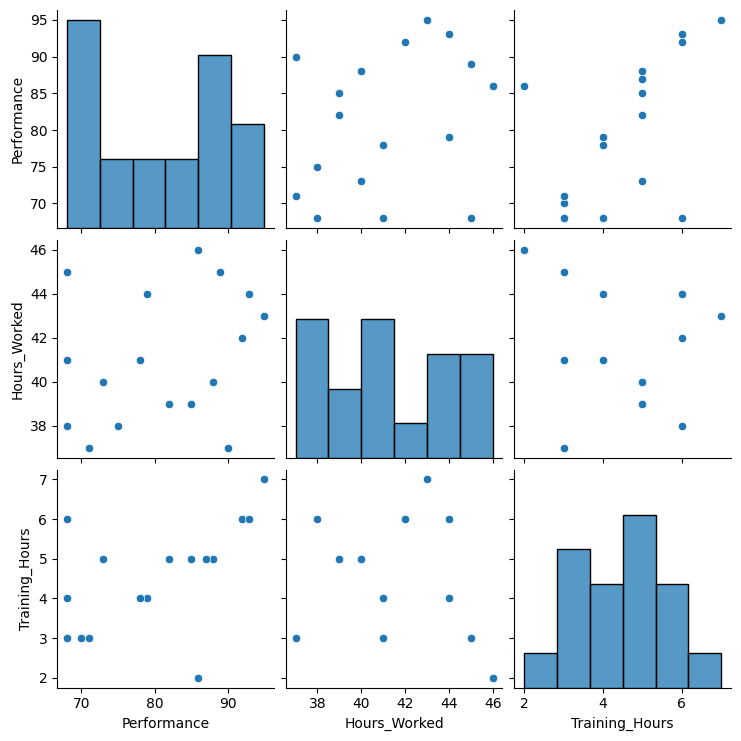

In [21]:
#Câu 13
# Vẽ pairplot
sns.pairplot(df[['Performance', 'Hours_Worked', 'Training_Hours']])
plt.show()


Đề xuất mô hình đánh giá hiệu suất mới:

Mô hình: Sử dụng một mô hình tổng hợp, trong đó kết hợp Performance, Hours_Worked và Training_Hours để tính toán hiệu suất.

Giải thích: Mô hình này phản ánh được mối quan hệ giữa các yếu tố ảnh hưởng đến hiệu suất và giúp công ty đánh giá nhân viên một cách chính xác hơn.

Location
Site_A    0.571429
Site_B    0.428571
Site_C    0.500000
dtype: float64


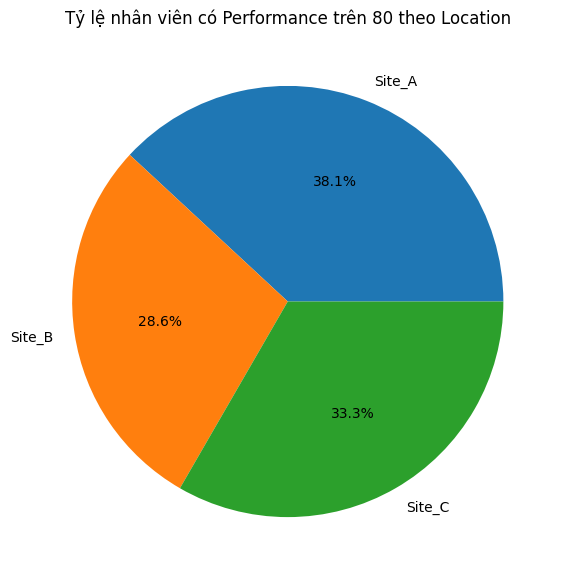

In [22]:
#Câu 14
# Tính tỷ lệ nhân viên có Performance trên 80
performance_above_80 = df[df['Performance'] > 80].groupby('Location').size() / df.groupby('Location').size()
print(performance_above_80)


# Vẽ pie chart so sánh
performance_above_80.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title("Tỷ lệ nhân viên có Performance trên 80 theo Location")
plt.show()


Đề xuất chiến lược khen thưởng:

Site_A: Khen thưởng nhân viên có Performance cao để giữ vững động lực làm việc.

Site_B: Cải thiện đào tạo và phát triển nhân viên có hiệu suất thấp hơn.

In [23]:
#Câu 15
# Hàm xác định nhân viên có Performance ngoài 2 độ lệch chuẩn
def identify_outliers(df):
    std_performance = df['Performance'].std()
    mean_performance = df['Performance'].mean()
    return df[(df['Performance'] < mean_performance - 2*std_performance) | (df['Performance'] > mean_performance + 2*std_performance)]

# Áp dụng hàm
outliers = identify_outliers(df)
print(outliers)


Empty DataFrame
Columns: [Employee_ID, Department, Performance, Hours_Worked, Training_Hours, Gender, Location, Performance_DepartmentFilled, Performance_LocationFilled, Efficiency]
Index: []


Đề xuất quy trình đánh giá lại hiệu suất:

Quy trình đánh giá: Phân tích kỹ hơn các nhân viên ngoài 2 độ lệch chuẩn, tìm hiểu nguyên nhân của hiệu suất cao hoặc thấp bất thường.

Giải thích: Quy trình này giúp đảm bảo đánh giá công bằng và tránh thiên vị, đồng thời giúp quản lý nhân sự đưa ra quyết định tốt hơn.

Câu hỏi ANN 

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:40<00:00, 244695.53it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 102350.32it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:09<00:00, 183206.25it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 4192457.92it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



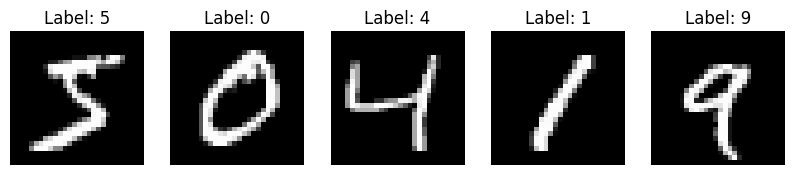

In [25]:
#Câu 16 
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Định nghĩa phép biến đổi: chuyển đổi ảnh thành tensor, chuẩn hóa về [0,1], và flatten
transform = transforms.Compose([
    transforms.ToTensor(),  # Chuyển thành tensor
    transforms.Normalize((0.5,), (0.5,)),  # Chuẩn hóa về [-1,1] (hoặc có thể để (0,1))
    transforms.Lambda(lambda x: x.view(-1))  # Flatten thành vector 784 chiều
])

# Tải dataset MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Lấy 5 mẫu ảnh đầu tiên
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    img, label = train_dataset[i]
    axes[i].imshow(img.view(28,28), cmap='gray')  # Chuyển lại về ma trận 28x28 để hiển thị
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()



Trực quan hóa khác
Dùng PCA (Principal Component Analysis) để giảm chiều dữ liệu xuống 2D và vẽ điểm dữ liệu.

Dùng T-SNE để xem các chữ số có phân tách rõ ràng không.

In [31]:
#Câu 17 
from torch.utils.data import DataLoader, random_split

# Chia train set thành 80% train, 20% validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Chiến lược chọn batch size
Batch size lớn (128, 256, 512)

Ưu điểm: Tận dụng GPU tốt hơn, tốc độ huấn luyện nhanh hơn.

Nhược điểm: Sử dụng nhiều RAM GPU, có thể dẫn đến mất thông tin do tính tổng quát kém hơn.

Batch size nhỏ (32, 16)

Ưu điểm: Tối ưu hóa tổng quát hóa, giảm overfitting.

Nhược điểm: Huấn luyện chậm hơn.

🔥 Gợi ý: Nếu có GPU mạnh, batch size 256 là lựa chọn tốt. Nếu dùng CPU, batch size 64 hợp lý.

In [27]:
#Câu 18 
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

# Định nghĩa kiến trúc ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Khởi tạo mô hình, loss, optimizer
model = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, verbose=True)

# Huấn luyện với early stopping
epochs = 20
patience = 5
best_val_loss = float('inf')
counter = 0
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs, targets = batch
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    
    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

    # Early stopping
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/20, Train Loss: 0.4987, Val Loss: 0.2702
Epoch 2/20, Train Loss: 0.2371, Val Loss: 0.1829
Epoch 3/20, Train Loss: 0.1732, Val Loss: 0.1358
Epoch 4/20, Train Loss: 0.1374, Val Loss: 0.1577
Epoch 5/20, Train Loss: 0.1189, Val Loss: 0.1194
Epoch 6/20, Train Loss: 0.1011, Val Loss: 0.1047
Epoch 7/20, Train Loss: 0.0906, Val Loss: 0.1140
Epoch 8/20, Train Loss: 0.0818, Val Loss: 0.0993
Epoch 9/20, Train Loss: 0.0733, Val Loss: 0.1110
Epoch 10/20, Train Loss: 0.0674, Val Loss: 0.0957
Epoch 11/20, Train Loss: 0.0619, Val Loss: 0.1138
Epoch 12/20, Train Loss: 0.0583, Val Loss: 0.1150
Epoch 13/20, Train Loss: 0.0529, Val Loss: 0.1079
Epoch 14/20, Train Loss: 0.0491, Val Loss: 0.0937
Epoch 15/20, Train Loss: 0.0448, Val Loss: 0.1162
Epoch 16/20, Train Loss: 0.0460, Val Loss: 0.0999
Epoch 17/20, Train Loss: 0.0432, Val Loss: 0.0949
Epoch 18/20, Train Loss: 0.0377, Val Loss: 0.1129
Epoch 19/20, Train Loss: 0.0391, Val Loss: 0.0944
Early stopping triggered.


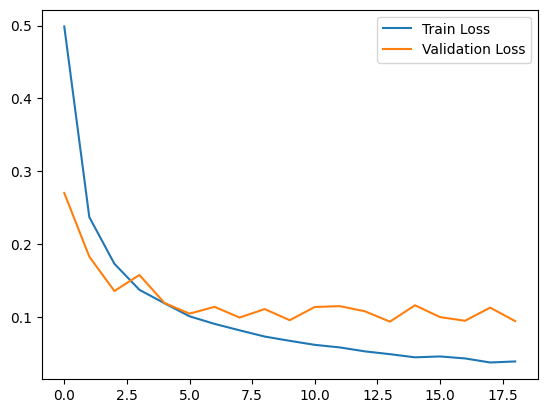

In [28]:
#Câu 18 Biểu đồ loss 
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.show()

Kiến trúc ANN khác
Tăng số neuron/tầng ẩn (Ví dụ: 256 → 128 → 64 → 10)

Thêm Batch Normalization để ổn định quá trình huấn luyện

Sử dụng Dropout để giảm overfitting

Test Accuracy: 97.48%


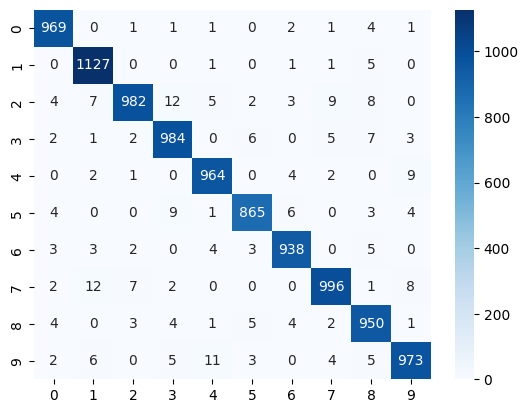

In [30]:
# Câu 19
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Dự đoán trên tập test
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.numpy())
        y_true.extend(targets.numpy())

# Đánh giá accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()


Cải thiện nếu accuracy < 95%
Tăng số tầng hoặc số neuron

Dùng augmentation (biến đổi dữ liệu)

Dùng mô hình CNN thay vì ANN 
Đánh giá mô hình

1. Accuracy là gì?
Accuracy = (Số dự đoán đúng) / (Tổng số mẫu)

Nếu accuracy < 95%, cần cải thiện mô hình.

2. Confusion Matrix
Hiển thị số lần dự đoán nhầm giữa các chữ số.

Ví dụ:

Chữ "3" thường bị nhầm với "8" do nét cong tương tự.

Chữ "1" dễ bị nhầm với "7".

3. Cách cải thiện nếu accuracy < 95%
Dùng augmentation: Thêm nhiễu, xoay ảnh, làm biến dạng nhẹ để giúp mô hình học tốt hơn.

Thử mô hình CNN thay vì ANN: CNN thường mạnh hơn với dữ liệu ảnh.

Tăng số neurons hoặc tầng ẩn: Để mô hình học được nhiều đặc trưng hơn.

